In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

### Part 1: Data Exploration and Preprocessing
#### 1.  Load the Data:  Load the Mall_Customers.csv file into  a pandas DataFrame.

In [2]:
df = pd.read_csv("Mall_Customers.csv")

#### 2.  Explore the Dataset: 
#### ○  Display the first few rows using .head(). 
#### ○  Get a summary of the data, including data types and non-null values, 
#### using .info(). 
#### ○  Generate descriptive statistics using .describe(). 

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### 3.  Data Selection:  For this lab, we are only interested  in the Annual Income (k) and Spending Score (1-100) columns. Create a new DataFrame or a NumPy array containing only these two features. 

In [6]:
df_final = df[['Annual Income (k$)','Spending Score (1-100)']]

In [7]:
df_final

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### 4.  Initial Visualization:  Create a scatter plot of Annual  Income vs. Spending Score to visualize the distribution of the data points. This will give you an initial intuition about the potential clusters. 

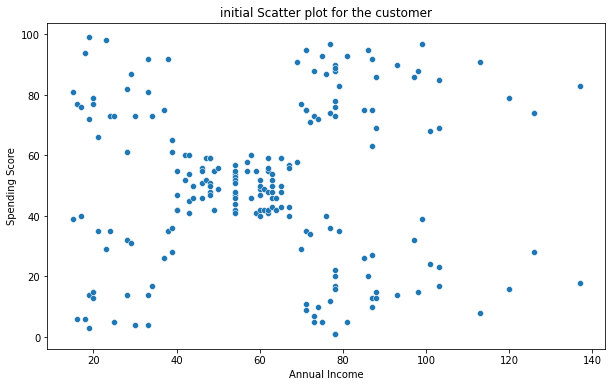

In [8]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = df_final['Annual Income (k$)'],y = df_final['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('initial Scatter plot for the customer')
plt.show()

### Part 2: K-Means Clustering
#### 1.  Finding the Optimal Number of Clusters (k): 
#### ○  Use the  Elbow Method  to determine the optimal value  of 'k'. 
#### ○  Iterate through a range of k values (e.g., 1 to 10). 
#### ○  For each k, fit a KMeans model and calculate the Within-Cluster Sum of Squares (WCSS), which is the inertia_ attribute of the fitted model. 
#### ○  Plot the WCSS values against the number of clusters (k). The "elbow" point on the graph indicates the optimal k. 

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final)

# Checking for the Shape aftre applying standard Sccaler.
print(df_final.shape)
print(X_scaled.shape)

# Descibing the DataFrame after the columns values are scaled.
print("Description for the original dataframe.")
print(df_final.describe())
print("Description for the Scaled DataFrame")
print(pd.DataFrame(X_scaled).describe())

(200, 2)
(200, 2)
Description for the original dataframe.
       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000
Description for the Scaled DataFrame
                  0             1
count  2.000000e+02  2.000000e+02
mean  -2.131628e-16 -1.465494e-16
std    1.002509e+00  1.002509e+00
min   -1.738999e+00 -1.910021e+00
25%   -7.275093e-01 -5.997931e-01
50%    3.587926e-02 -7.764312e-03
75%    6.656748e-01  8.851316e-01
max    2.917671e+00  1.894492e+00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


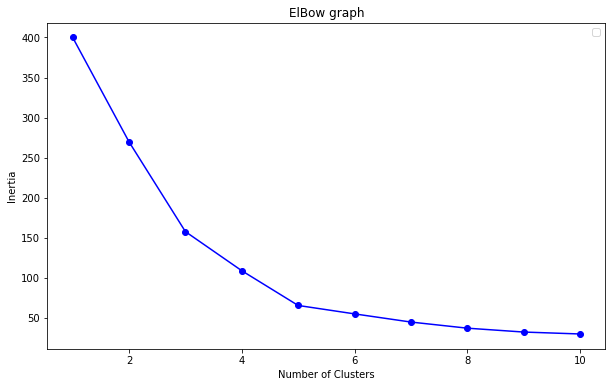

In [15]:
inertias = []
K_range = range(1,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(pd.DataFrame(X_scaled))
    inertias.append(kmeans.inertia_)

plt.figure(figsize = (10,6))
plt.plot(K_range,inertias,'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("ElBow graph")
plt.legend()
plt.show()

#### Here, 5 is optimal number of Clusters.

#### 2.  Applying K-Means: 
#### ○  Based on the Elbow Method, choose the optimal k. 
#### ○  Initialize and fit the KMeans model to your data with the chosen number 
#### of clusters. 
#### ○  Get the cluster labels for each data point from the labels_ attribute.

In [19]:
kmeans = KMeans(n_clusters = 5,random_state=42, n_init=10)
k_labels = kmeans.fit_predict(X_scaled)

print("K-means cluster centers:")
print(kmeans.cluster_centers_)

print(f"\nInertia(WCSS): {kmeans.inertia_}")

K-means cluster centers:
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]

Inertia(WCSS): 65.56840815571681


#### 3.  Visualize K-Means Results: 
#### ○  Create a scatter plot of the data points, coloring each point according to 
#### its assigned cluster label. 
#### ○  Plot the centroids of the clusters on the same graph to clearly mark the 
#### center of each group. 
#### ○  Add a title, axis labels, and a legend to your plot.

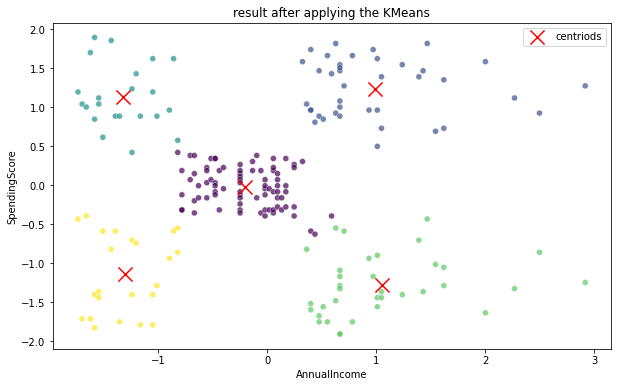

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = X_scaled[:,0],y = X_scaled[:,1],c=k_labels,cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',marker='x',label='centriods')
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.title("result after applying the KMeans")
plt.legend()
plt.show()

### Part 3: Agglomerative Hierarchical Clustering 
#### 1.  Creating a Dendrogram: 
#### ○  Use the scipy.cluster.hierarchy library to generate a dendrogram for your 
#### data. A ward linkage method is recommended. 
#### ○  Visualize the dendrogram. The y-axis represents the distance between 
#### clusters. The optimal number of clusters can be determined by finding 
#### the tallest vertical line that doesn't cross any extended horizontal lines 
#### and counting the number of vertical lines it intersects. 

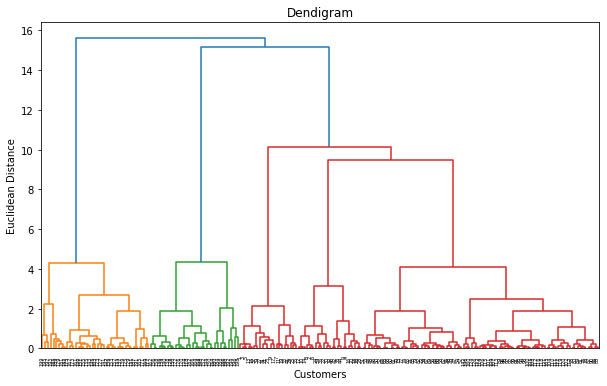

In [32]:
plt.figure(figsize=(10,6))
linked = linkage(X_scaled,method='ward')
dendrogram(linked)
plt.title("Dendigram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

#### Same as K-Means, 5 will be optimal number of clusters.

#### 2.  Applying Hierarchical Clustering: 
#### ○  Based on your analysis of the dendrogram, choose the optimal number 
#### of clusters. 
#### ○  Initialize and fit an AgglomerativeClustering model from scikit-learn with your chosen number of clusters and ward affinity. 
#### ○  Get the cluster labels for each data point.

In [35]:
hc = AgglomerativeClustering(n_clusters = 5)
hc_predict = hc.fit_predict(X_scaled)

#### 3.  Visualize Hierarchical Clustering Results: 
#### ○  Create a scatter plot similar to the one for K-Means, coloring each data point according to its assigned cluster from the hierarchical model. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


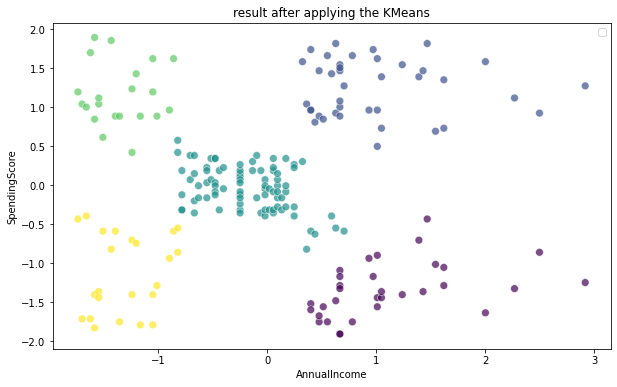

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = X_scaled[:,0],y = X_scaled[:,1],c=hc_predict,cmap='viridis', alpha=0.7,palette='tab10',s=60)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.title("Result after applying the Hierchical Clustering")
plt.legend()
plt.show()

### Part 4: DBSCAN Clustering

#### 1.  Applying DBSCAN: 
#### ○  DBSCAN does not require you to specify the number of clusters beforehand. Instead, it requires two parameters: eps (the maximum distance between two samples for one to be considered as in the neighborhood of the other) and min_samples (the number of samples ina neighborhood for a point to be considered as a core point). 
#### ○  Experiment with different values for eps and min_samples. A good starting point for this dataset could be eps=5 and min_samples=5. 
#### ○  Initialize and fit the DBSCAN model to your data. 
#### ○  Get the cluster labels. Note that DBSCAN will label noise points as -1. 

In [51]:
dbscan = DBSCAN(eps=0.3,min_samples=6)
dbscan_predict = dbscan.fit_predict(X_scaled)

#### 2.  Visualize DBSCAN Results: 
#### ○  Create a scatter plot of the data, coloring points by their cluster label. 
#### ○  Make sure to handle the noise points (label -1). It is common practice to plot them in a distinct color, like black, to differentiate them from the actual clusters.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


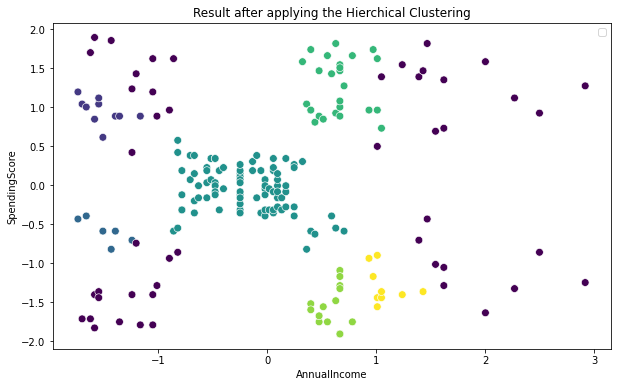

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = X_scaled[:,0],y = X_scaled[:,1],c=dbscan_predict,palette='tab10', s=60)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.title("Result after applying the Hierchical Clustering")
plt.legend()
plt.show()